METRICAS para GAUSSIAN COPULA basic shiptype

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
import scipy.stats as stats

In [3]:
#Cargar los datos reales y sinteticos
df_real = pd.read_csv('final_static_data_basic.csv',index_col=0)
df_synth = pd.read_csv('synthetic_static_basic_GaussianCopula.csv')

In [5]:
print(df_real.columns)
print(df_synth.columns)

Index(['MMSI', 'draught', 'to_bow', 'to_stern', 'to_port', 'to_starboard',
       'shiptype'],
      dtype='object')
Index(['MMSI', 'draught', 'to_bow', 'to_stern', 'to_port', 'to_starboard',
       'shiptype'],
      dtype='object')


In [6]:
# Eliminar las columnas 'MMSI' 
df_real_limpio = df_real.drop(columns=['MMSI'])
df_synth_limpio = df_synth.drop(columns=['MMSI'])

In [7]:
print(df_real_limpio.columns)
print(df_synth_limpio.columns)

Index(['draught', 'to_bow', 'to_stern', 'to_port', 'to_starboard', 'shiptype'], dtype='object')
Index(['draught', 'to_bow', 'to_stern', 'to_port', 'to_starboard', 'shiptype'], dtype='object')


In [8]:
print("Tipos de barco en datos reales:", df_real_limpio["shiptype"].unique())
print("Tipos de barco en datos sintéticos:", df_synth_limpio["shiptype"].unique())

Tipos de barco en datos reales: ['ShipType.Tug' 'ShipType.Fishing' 'ShipType.Cargo' 'ShipType.Passenger'
 'ShipType.Tanker']
Tipos de barco en datos sintéticos: ['ShipType.Tanker' 'ShipType.Cargo' 'ShipType.Fishing'
 'ShipType.Passenger' 'ShipType.Tug']


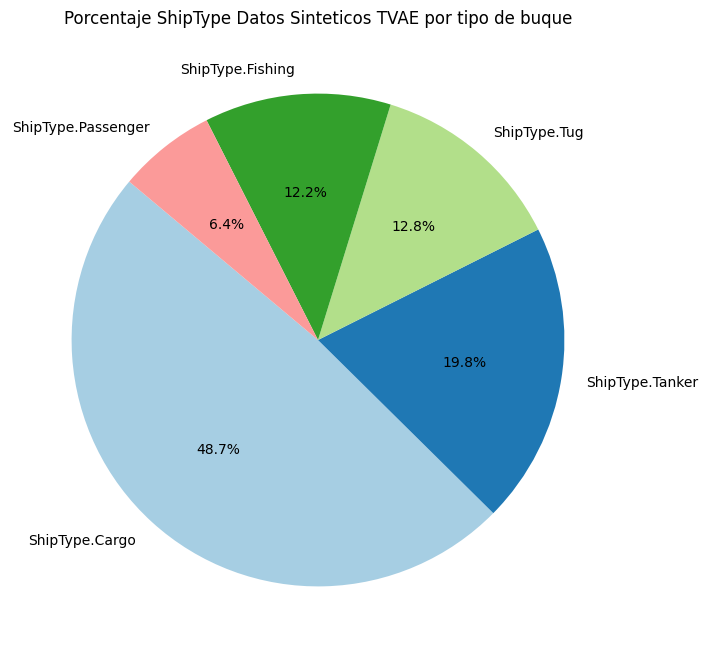

In [9]:
#Porcentaje de cada shiptype
shiptype_percentage = df_synth_limpio["shiptype"].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(shiptype_percentage, labels=shiptype_percentage.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Porcentaje ShipType Datos Sinteticos TVAE por tipo de buque")
plt.show()

In [10]:
# Obtener los tipos de barco únicos
tipos_barco = df_real_limpio["shiptype"].unique()

Procesando ShipType.Tug...
   - Generando gráfico para draught


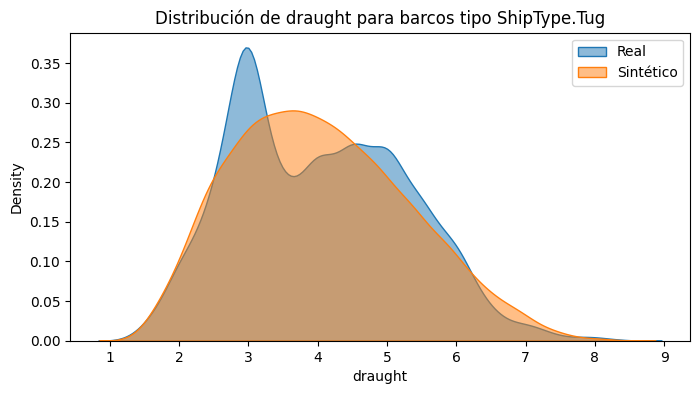

   - Generando gráfico para to_bow


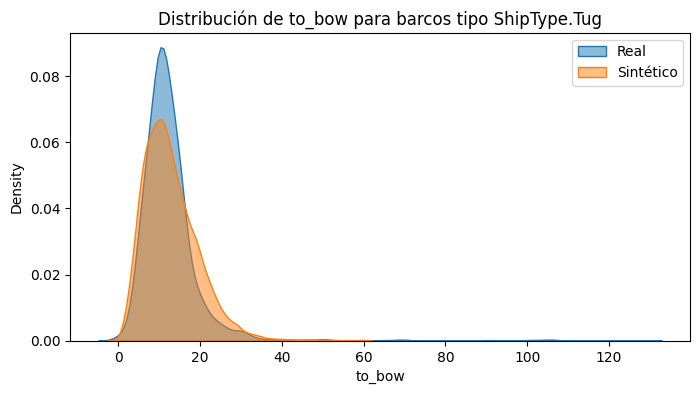

   - Generando gráfico para to_stern


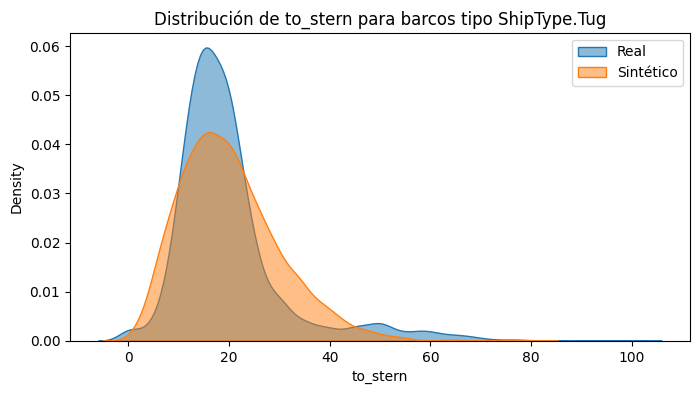

   - Generando gráfico para to_port


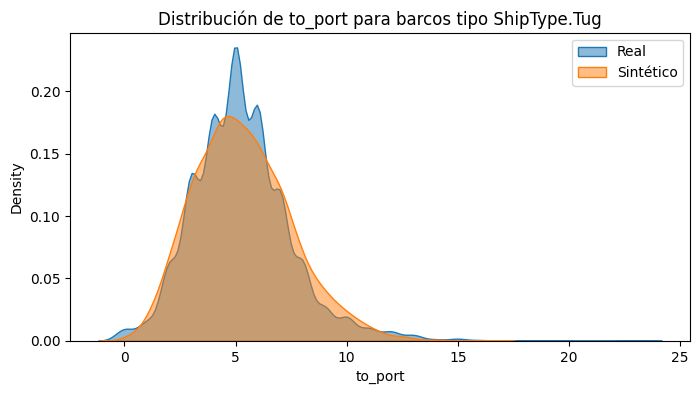

   - Generando gráfico para to_starboard


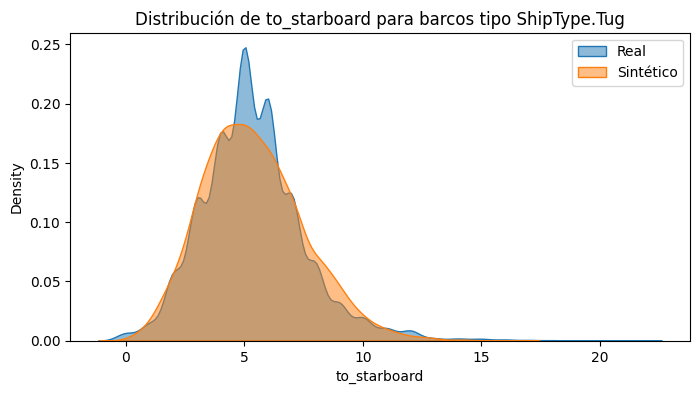

Procesando ShipType.Fishing...
   - Generando gráfico para draught


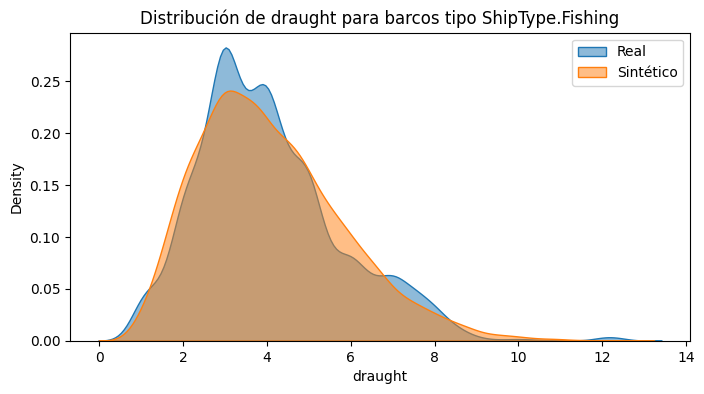

   - Generando gráfico para to_bow


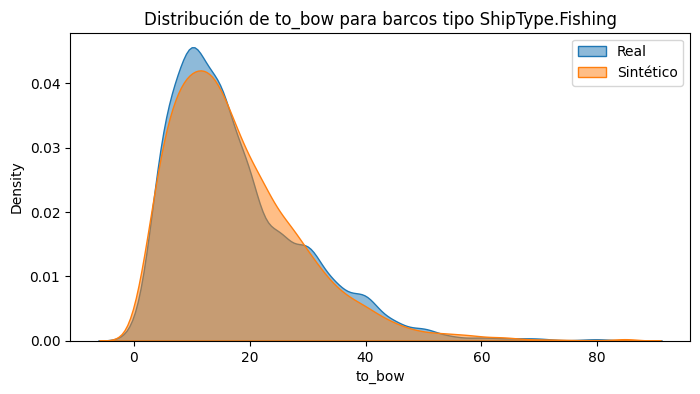

   - Generando gráfico para to_stern


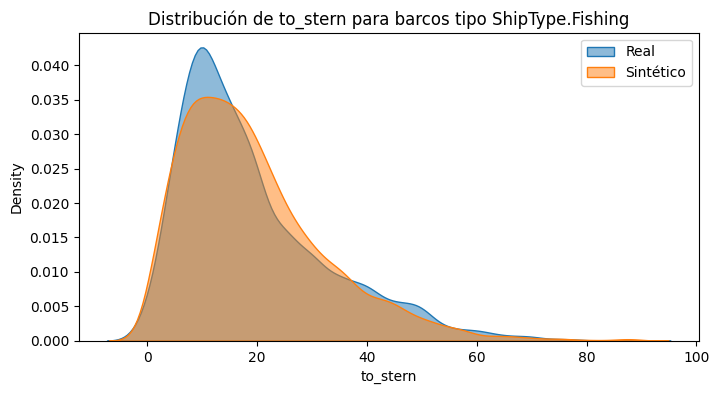

   - Generando gráfico para to_port


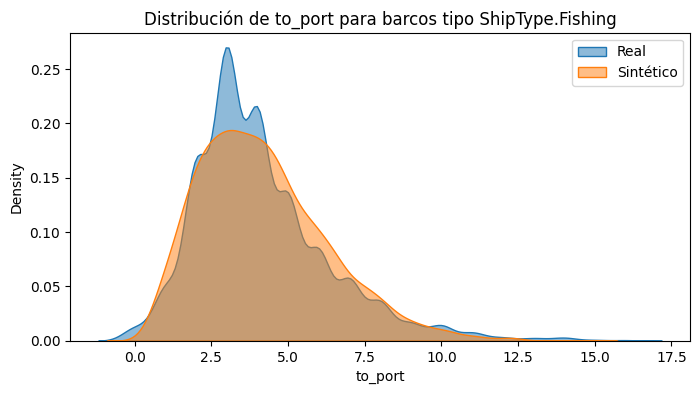

   - Generando gráfico para to_starboard


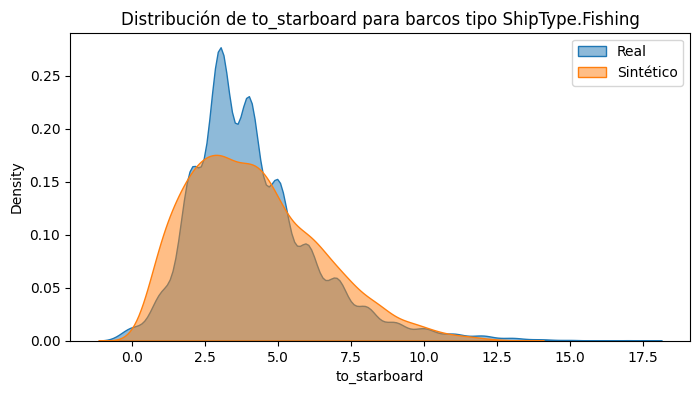

Procesando ShipType.Cargo...
   - Generando gráfico para draught


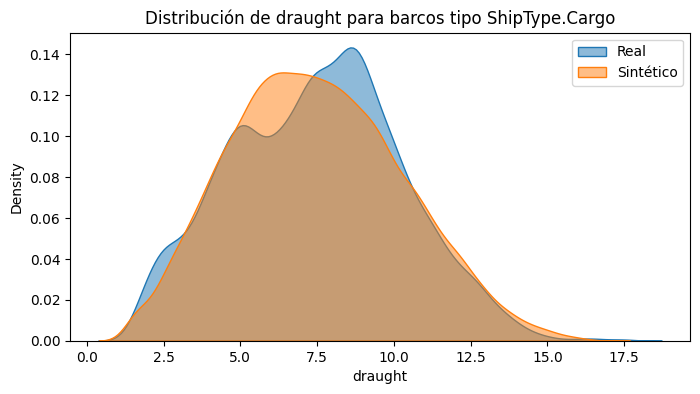

   - Generando gráfico para to_bow


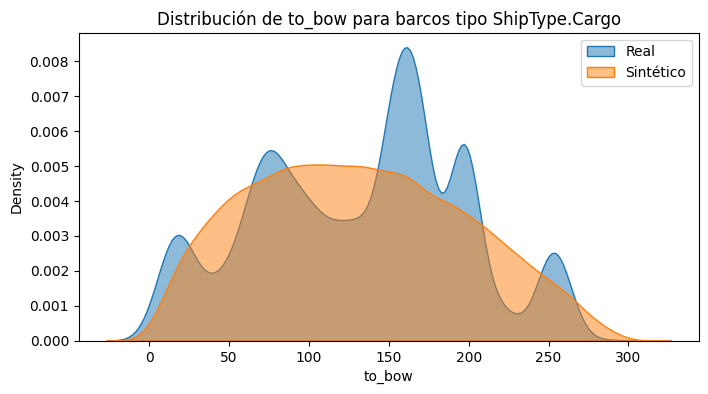

   - Generando gráfico para to_stern


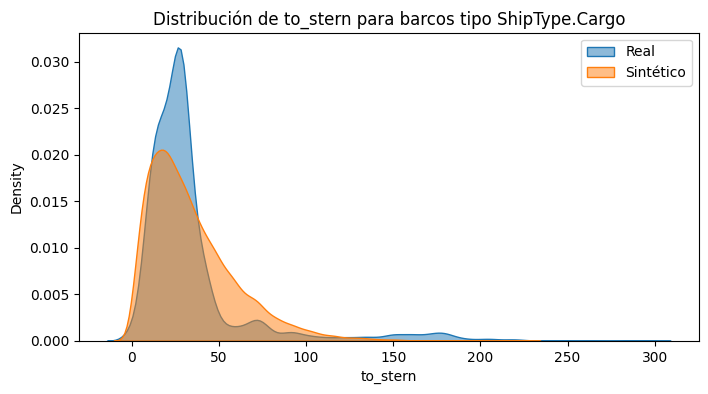

   - Generando gráfico para to_port


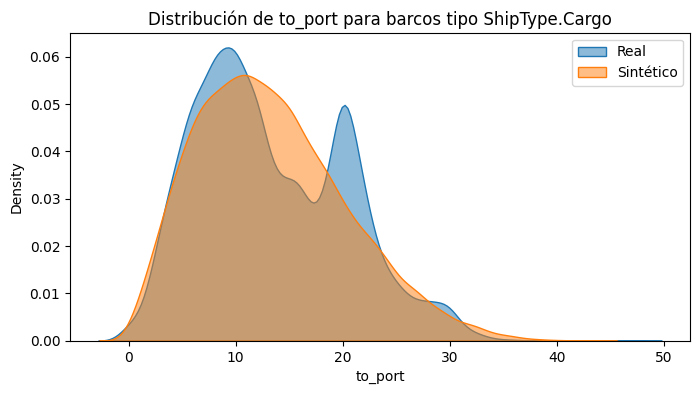

   - Generando gráfico para to_starboard


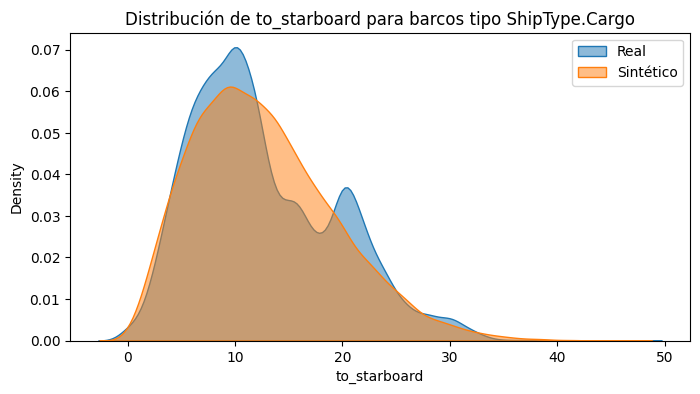

Procesando ShipType.Passenger...
   - Generando gráfico para draught


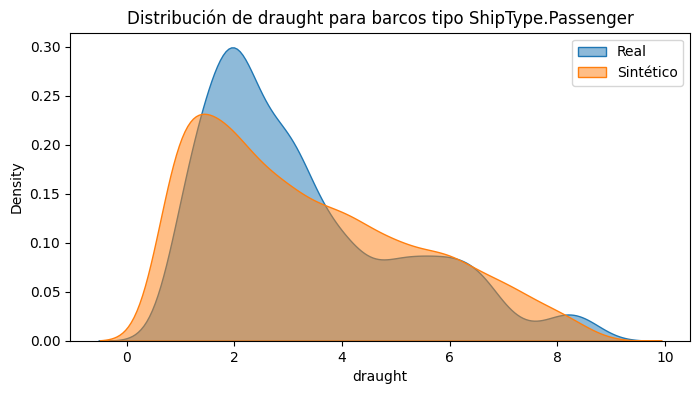

   - Generando gráfico para to_bow


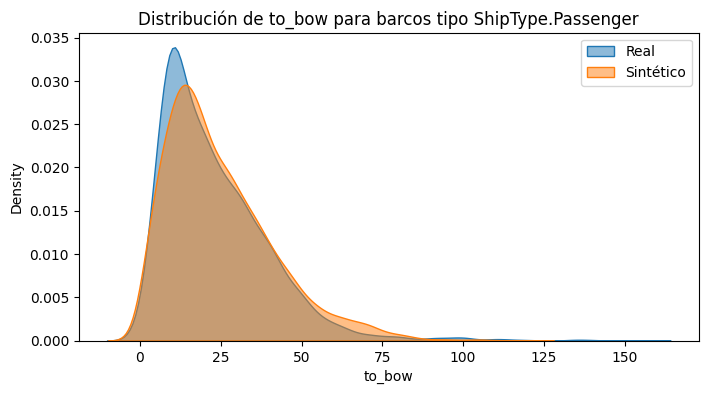

   - Generando gráfico para to_stern


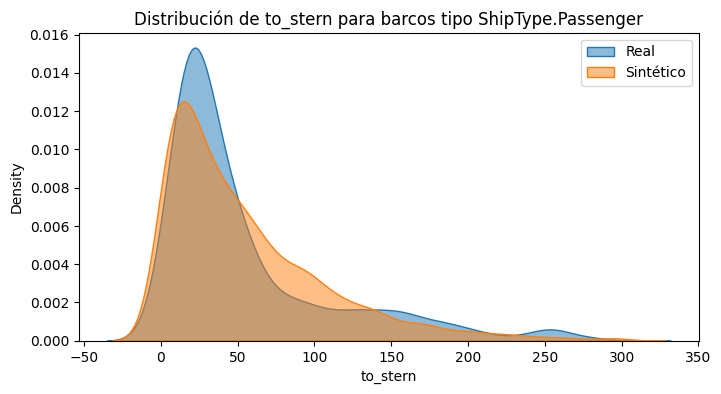

   - Generando gráfico para to_port


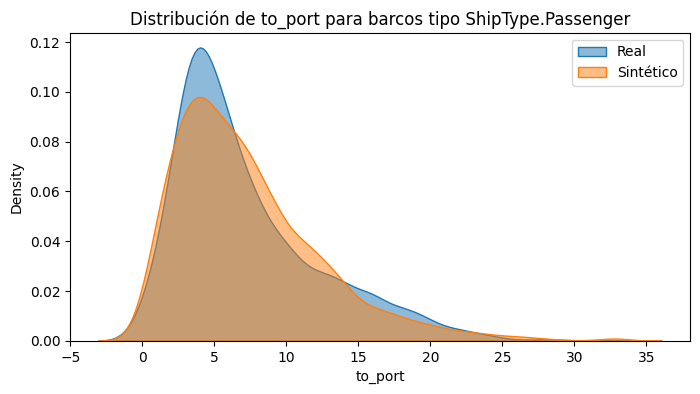

   - Generando gráfico para to_starboard


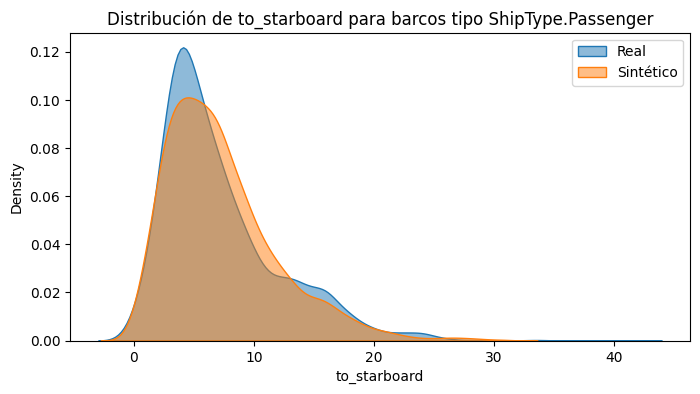

Procesando ShipType.Tanker...
   - Generando gráfico para draught


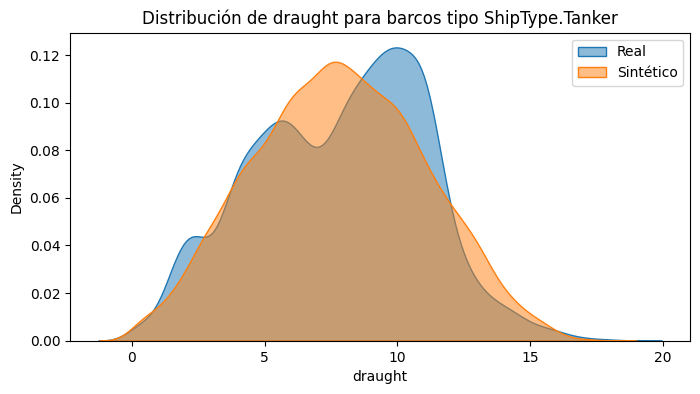

   - Generando gráfico para to_bow


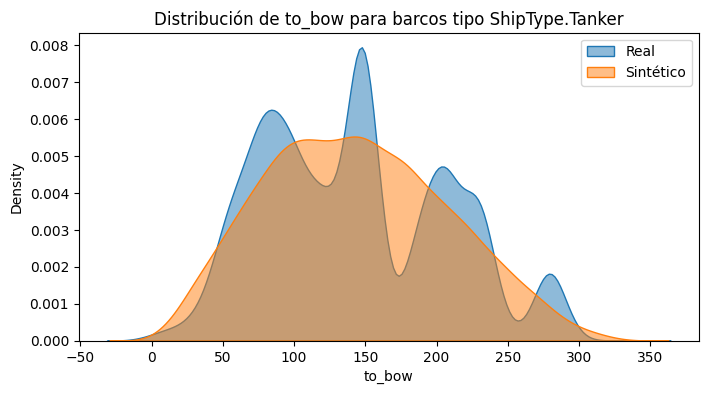

   - Generando gráfico para to_stern


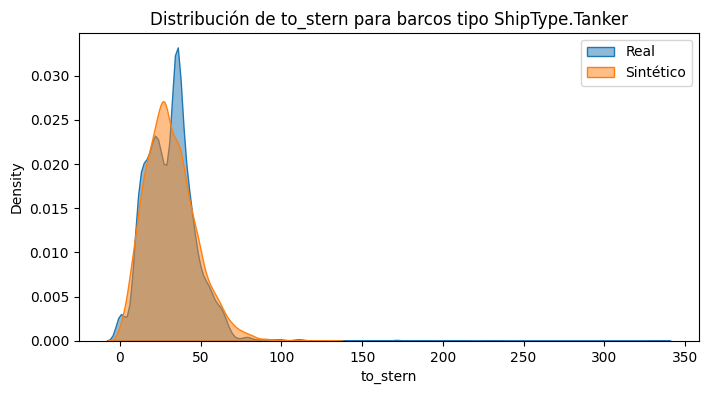

   - Generando gráfico para to_port


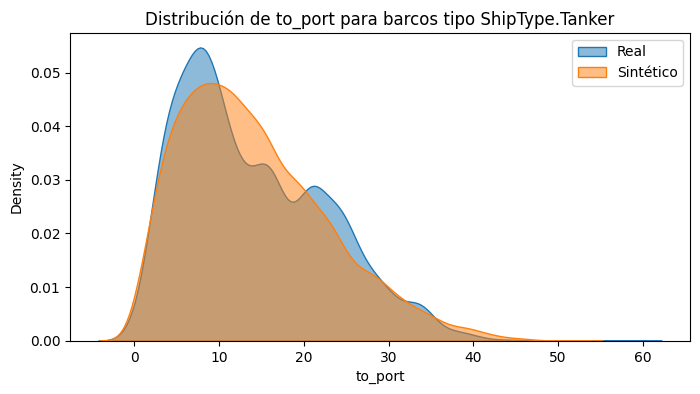

   - Generando gráfico para to_starboard


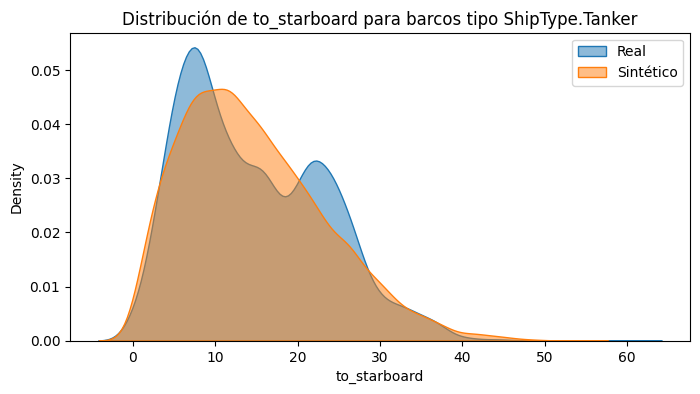

In [11]:
#Comparacion de distribuciones de cada parametro para cada tipo de barco
for shiptype in tipos_barco:
    print(f"Procesando {shiptype}...")  # Esto imprimirá cada barco que se está procesando
    df_real_tipo = df_real_limpio[df_real["shiptype"] == shiptype]
    df_synth_tipo = df_synth_limpio[df_synth["shiptype"] == shiptype]

    for column in df_real_tipo.select_dtypes(include=[np.number]).columns:
        print(f"   - Generando gráfico para {column}")  # Para ver qué columnas está procesando
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df_real_tipo[column], label='Real', fill=True, alpha=0.5)
        
        if not df_synth_tipo.empty:
            sns.kdeplot(df_synth_tipo[column], label='Sintético', fill=True, alpha=0.5)
        
        plt.title(f'Distribución de {column} para barcos tipo {shiptype}')
        plt.legend()
        plt.show()

In [12]:
# Estadísticas descriptivas
# Agrupar por shiptype
stats_real = df_real_limpio.groupby("shiptype").describe()
stats_synth = df_synth_limpio.groupby("shiptype").describe()
# Mostrar estadísticas de cada tipo de barco
for shiptype in df_synth_limpio["shiptype"].unique():
    print(f"\n📊 Estadísticas para {shiptype} (Datos Sintéticos):\n")
    print(stats_synth.loc[shiptype])


📊 Estadísticas para ShipType.Tanker (Datos Sintéticos):

draught       count    9903.000000
              mean        7.819317
              std         3.210288
              min         0.300000
              25%         5.508910
              50%         7.786873
              75%        10.105369
              max        17.474695
to_bow        count    9903.000000
              mean      143.755085
              std        63.962177
              min         0.839603
              25%        94.871689
              50%       140.593944
              75%       189.042434
              max       332.431813
to_stern      count    9903.000000
              mean       31.383344
              std        15.720215
              min         0.000000
              25%        20.054563
              50%        29.508164
              75%        40.599929
              max       130.247863
to_port       count    9903.000000
              mean       14.182204
              std         8.6752

In [13]:
# Obtener los tipos de barco únicos en los datos  sintéticos
ship_types_synth = df_synth_limpio["shiptype"].unique()

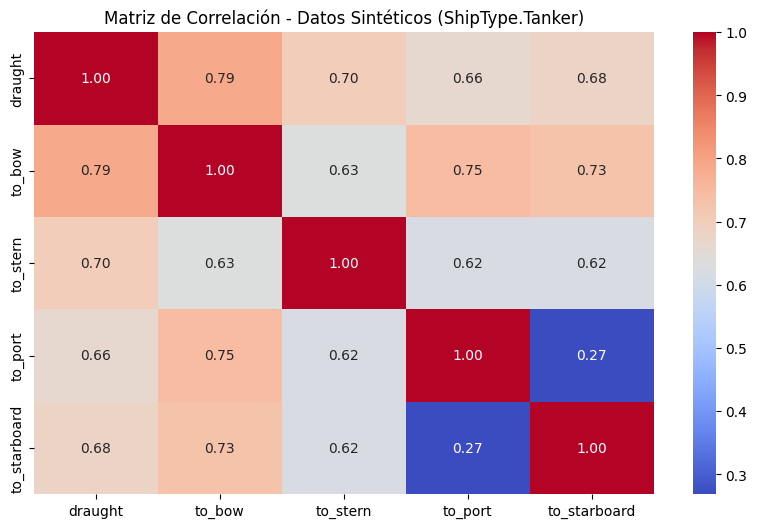

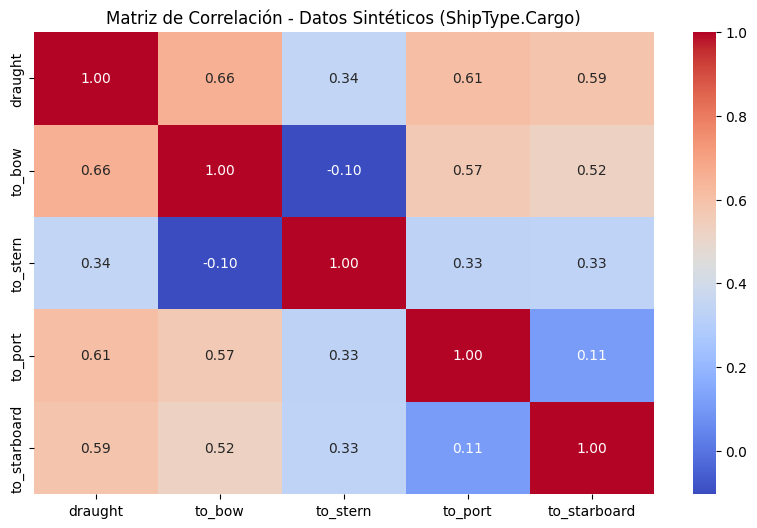

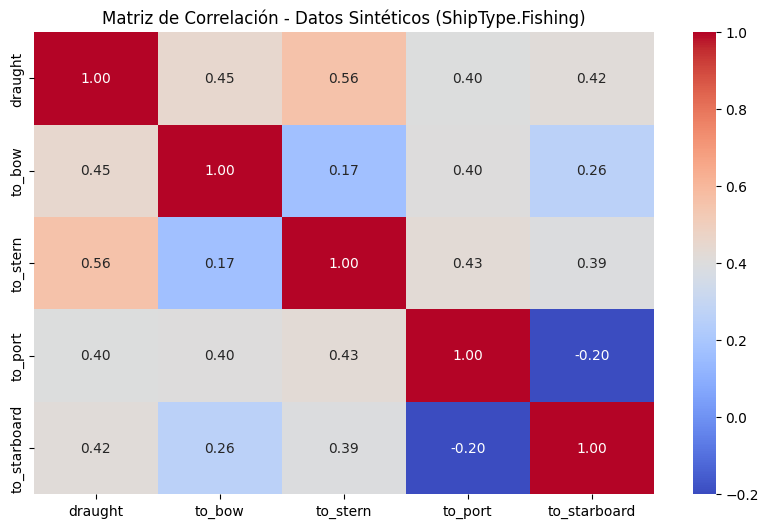

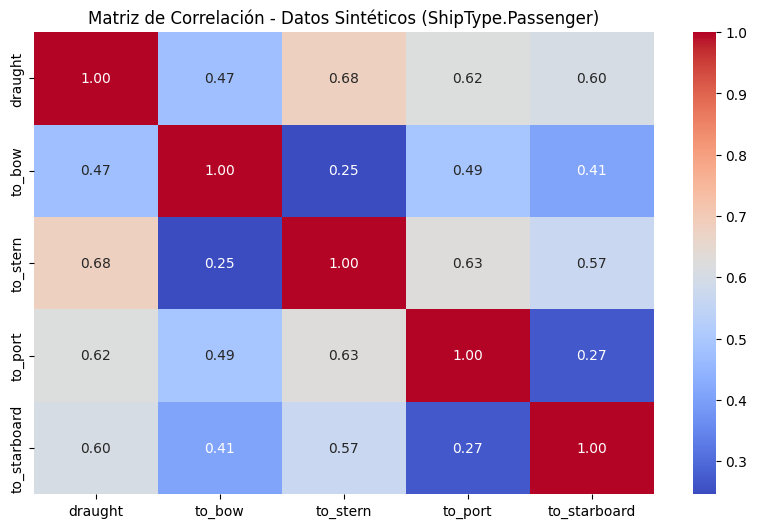

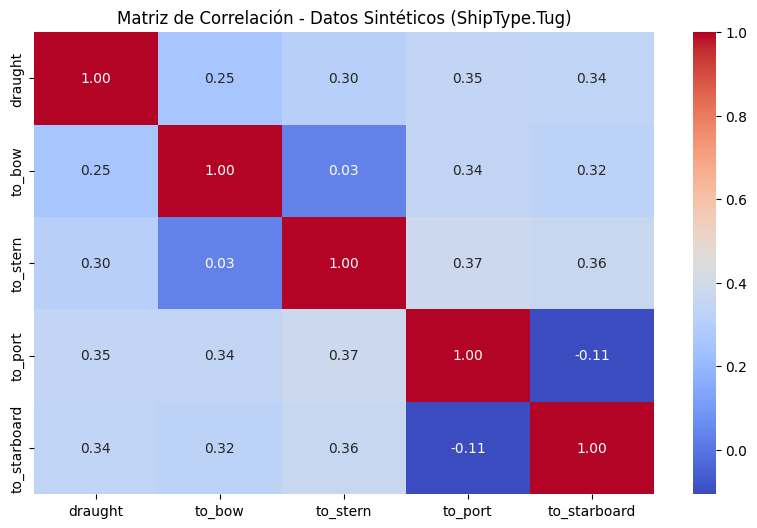

In [14]:
# Graficar las matrices de correlación
for ship in ship_types_synth:
    df_ship_synth = df_synth_limpio[df_synth["shiptype"] == ship].select_dtypes(include=[np.number])
    
    if not df_ship_synth.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_ship_synth.corr(), cmap="coolwarm", annot=True, fmt=".2f")
        plt.title(f"Matriz de Correlación - Datos Sintéticos ({ship})")
        plt.show()

Evaluando tipo de barco: ShipType.Tug


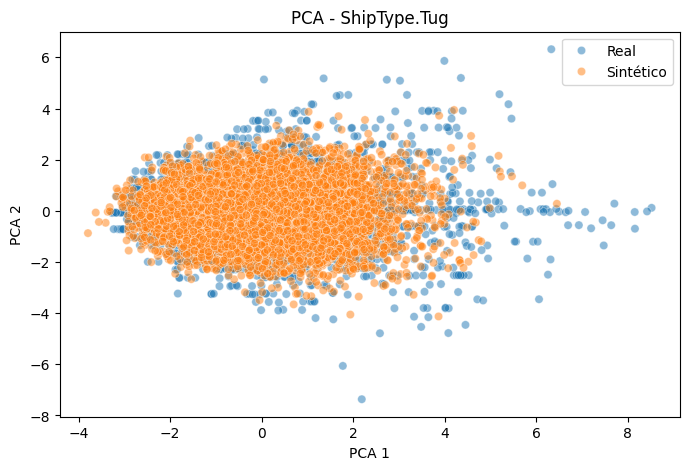

Evaluando tipo de barco: ShipType.Fishing


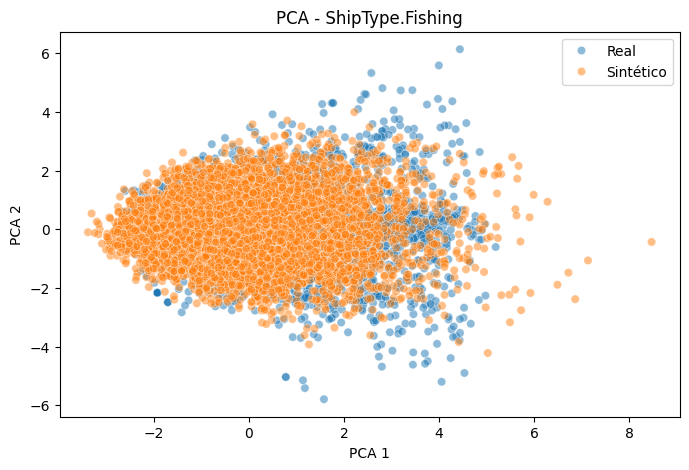

Evaluando tipo de barco: ShipType.Cargo


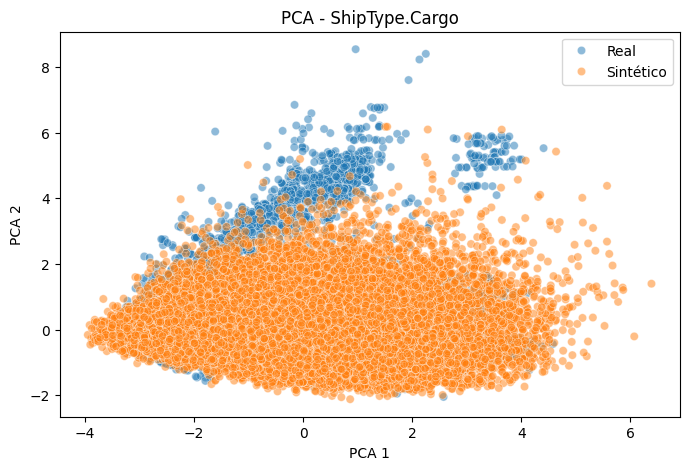

Evaluando tipo de barco: ShipType.Passenger


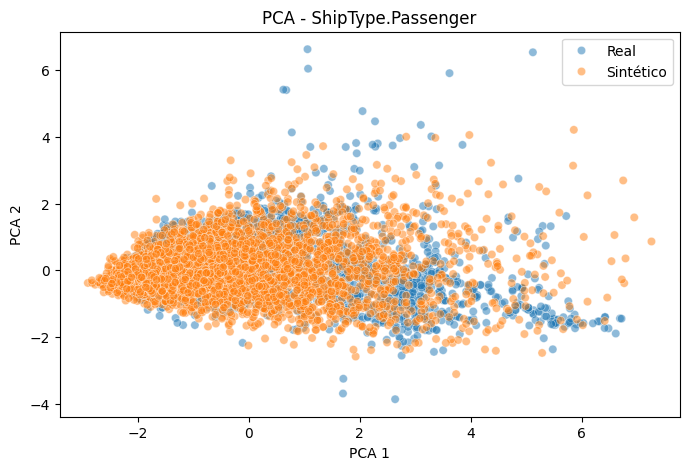

Evaluando tipo de barco: ShipType.Tanker


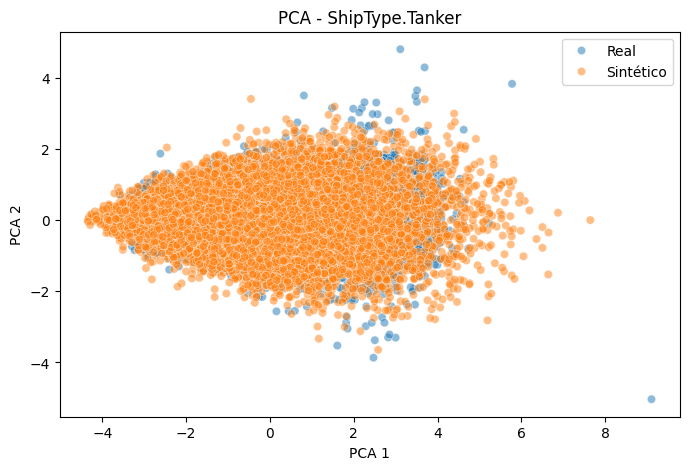

In [15]:
#PCA
#Iterar sobre los tipos de barco
for shiptype in tipos_barco:
    print(f"Evaluando tipo de barco: {shiptype}")

    # Filtrar los datos reales y sintéticos
    df_real_tipo = df_real_limpio[df_real["shiptype"] == shiptype].select_dtypes(include=[np.number])
    df_synth_tipo = df_synth_limpio[df_synth["shiptype"] == shiptype].select_dtypes(include=[np.number])

    # Unir los datos reales y sintéticos para PCA
    df_real_tipo["label"] = "Real"
    df_synth_tipo["label"] = "Sintético"
    df_combined = pd.concat([df_real_tipo, df_synth_tipo], ignore_index=True)

    # Normalizar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_combined.drop(columns=["label"], errors="ignore"))

    # Aplicar PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled)

    # Agregar los resultados al DataFrame combinado
    df_combined["PCA1"] = pca_result[:, 0]
    df_combined["PCA2"] = pca_result[:, 1]

    # Graficar PCA diferenciando reales y sintéticos
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_combined, x="PCA1", y="PCA2", hue="label", alpha=0.5)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(f"PCA - {shiptype}")
    plt.legend()
    plt.show()

Evaluando tipo de barco: ShipType.Tug


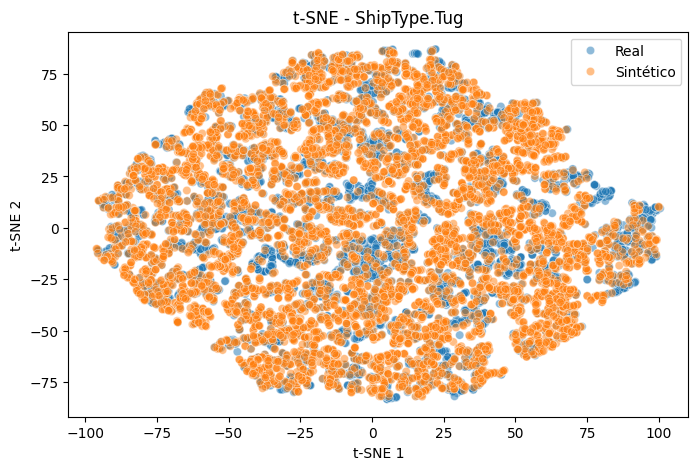

Evaluando tipo de barco: ShipType.Fishing


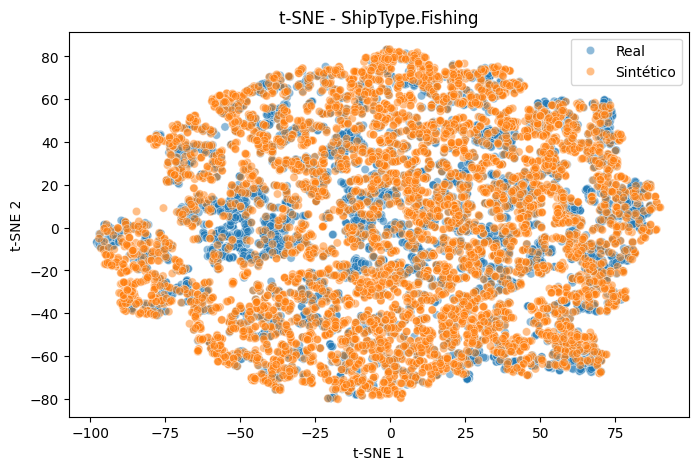

Evaluando tipo de barco: ShipType.Cargo


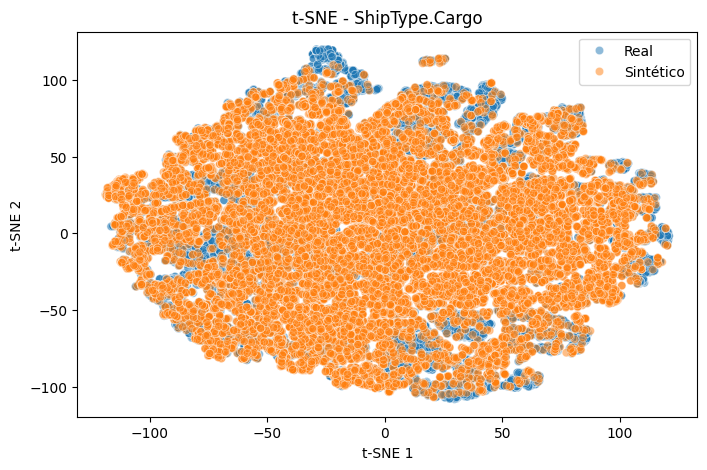

Evaluando tipo de barco: ShipType.Passenger


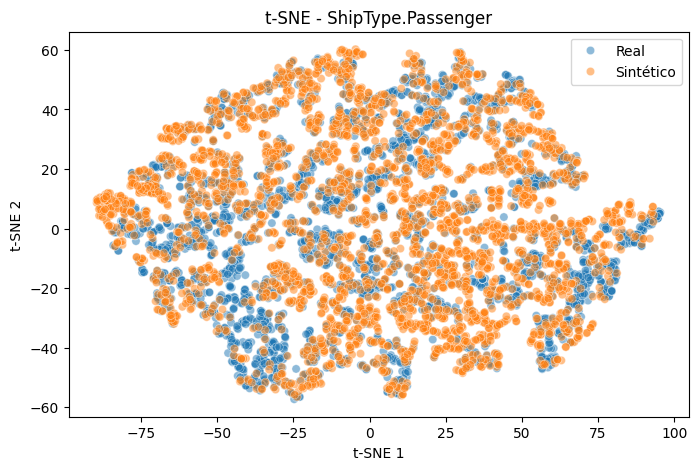

Evaluando tipo de barco: ShipType.Tanker


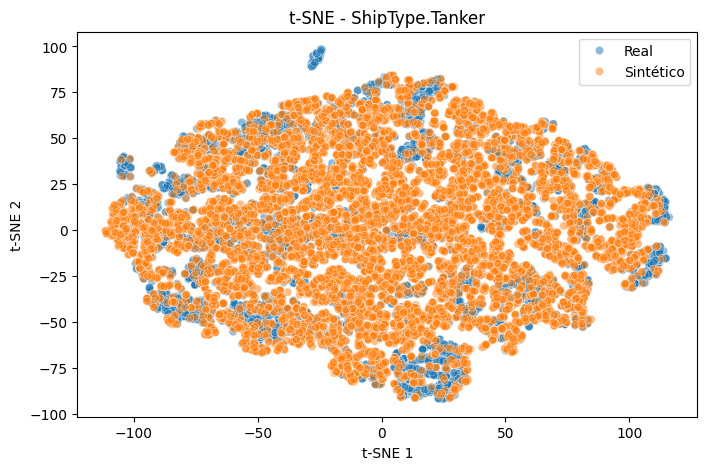

In [16]:
# t-SNE para visualización más detallada
# Iterar sobre los tipos de barco
for shiptype in tipos_barco:
    print(f"Evaluando tipo de barco: {shiptype}")

    # Filtrar los datos reales y sintéticos
    df_real_tipo = df_real_limpio[df_real["shiptype"] == shiptype].select_dtypes(include=[np.number])
    df_synth_tipo = df_synth_limpio[df_synth["shiptype"] == shiptype].select_dtypes(include=[np.number])

    # Normalizar los datos
    scaler = StandardScaler()
    df_scaled_real = scaler.fit_transform(df_real_tipo)  # Normalizar los datos reales
    df_scaled_synth = scaler.transform(df_synth_tipo)  # Normalizar los datos sintéticos

    # Concatenar los datos para aplicar t-SNE
    df_combined = np.vstack((df_scaled_real, df_scaled_synth))  # Combinar matrices
    labels = ['Real'] * df_scaled_real.shape[0] + ['Sintético'] * df_scaled_synth.shape[0]  # Crear etiquetas

    # Aplicar t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(df_combined)

    # Crear un DataFrame con los resultados de t-SNE
    df_tsne = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
    df_tsne['label'] = labels  # Añadir las etiquetas

    # Graficar t-SNE diferenciando reales y sintéticos
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='label', alpha=0.5)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title(f't-SNE - {shiptype}')
    plt.legend()
    plt.show()

In [17]:
#CHI-CUADRADO
# Contar ocurrencias de cada shiptype en los datos reales y sintéticos 
freq_real = df_real_limpio['shiptype'].value_counts().sort_index() 
freq_synth = df_synth_limpio['shiptype'].value_counts().sort_index() 

# Unir ambas distribuciones en un DataFrame 
freq_df = pd.DataFrame({'Real': freq_real, 'Sintético': freq_synth}).fillna(0) 

# Aplicar la prueba de chi-cuadrado 
chi2_stat, p_value, dof, expected = stats.chi2_contingency(freq_df) 

# Mostrar resultados 
print("Estadístico Chi-cuadrado:", chi2_stat) 
print("Grados de libertad:", dof) 
print("Valor p:", p_value) 

# Interpretación 
alpha = 0.05  # Nivel de significancia 
if p_value < alpha: 
    print("⚠️ Rechazamos la hipótesis nula: hay diferencias significativas entre las distribuciones.") 
else:
    print("✅ No se rechaza la hipótesis nula: las distribuciones son similares.") 

Estadístico Chi-cuadrado: 4.0988078529712404e-05
Grados de libertad: 4
Valor p: 0.9999999997900001
✅ No se rechaza la hipótesis nula: las distribuciones son similares.


In [18]:
#KS-Test
# Obtener los tipos de barco únicos
tipos_barco = df_real_limpio["shiptype"].unique()

# Diccionario para almacenar resultados
ks_results = {}

# Aplicar KS-Test a cada tipo de barco y cada variable numérica
for shiptype in tipos_barco:
    print(f"\n📊 KS-Test para el tipo de barco: {shiptype}\n")
    
    df_real_tipo = df_real_limpio[df_real_limpio["shiptype"] == shiptype]
    df_synth_tipo = df_synth_limpio[df_synth_limpio["shiptype"] == shiptype]

    # Asegurar que solo se usen columnas numéricas
    columnas_numericas = df_real_tipo.select_dtypes(include=[np.number]).columns

    for column in columnas_numericas:
        if column in df_synth_tipo.columns:  # Evitar errores si la columna no existe en los sintéticos
            ks_stat, p_value = ks_2samp(df_real_tipo[column], df_synth_tipo[column])
            print(f"{column}: KS-Statistic={ks_stat:.4f}, P-Value={p_value:.4f}")
            ks_results[(shiptype, column)] = {"KS-Statistic": ks_stat, "P-Value": p_value}

# Convertir los resultados en un DataFrame y guardarlos en CSV
ks_df = pd.DataFrame.from_dict(ks_results, orient="index")
ks_df.to_csv("ks_test_results_GC_basic_shiptype.csv")

print("\n✅ Resultados guardados en 'ks_test_results_GC_sin_distincion.csv'.")


📊 KS-Test para el tipo de barco: ShipType.Tug

draught: KS-Statistic=0.0732, P-Value=0.0000
to_bow: KS-Statistic=0.1284, P-Value=0.0000
to_stern: KS-Statistic=0.1277, P-Value=0.0000
to_port: KS-Statistic=0.1115, P-Value=0.0000
to_starboard: KS-Statistic=0.1170, P-Value=0.0000

📊 KS-Test para el tipo de barco: ShipType.Fishing

draught: KS-Statistic=0.0589, P-Value=0.0000
to_bow: KS-Statistic=0.0490, P-Value=0.0000
to_stern: KS-Statistic=0.0595, P-Value=0.0000
to_port: KS-Statistic=0.1366, P-Value=0.0000
to_starboard: KS-Statistic=0.1462, P-Value=0.0000

📊 KS-Test para el tipo de barco: ShipType.Cargo

draught: KS-Statistic=0.0355, P-Value=0.0000
to_bow: KS-Statistic=0.0896, P-Value=0.0000
to_stern: KS-Statistic=0.1702, P-Value=0.0000
to_port: KS-Statistic=0.0715, P-Value=0.0000
to_starboard: KS-Statistic=0.0710, P-Value=0.0000

📊 KS-Test para el tipo de barco: ShipType.Passenger

draught: KS-Statistic=0.0918, P-Value=0.0000
to_bow: KS-Statistic=0.0799, P-Value=0.0000
to_stern: KS-Stat